In [1]:
import numpy as np
from sklearn.datasets import load_digits
import gtda.homology
import gtda.diagrams
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler
from topconv import topfiltlearn

In [2]:
%load_ext autoreload
%autoreload 2

In [14]:
#Load data
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
X = x_train[:5000]
y = y_train[:5000]
print(np.shape(X))
#digits = load_digits()
#X = np.reshape(digits.data, (len(digits.data),8,8))
#y = digits.target


(5000, 28, 28)


kNN Results:  [0.46490702 0.46430714 0.45678271]
Gradient Boosting Results:  [0.48230354 0.45770846 0.47418968]


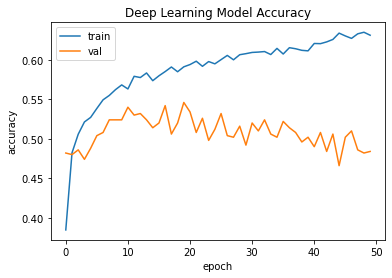

In [15]:
# Baseline : Not Using any filters
topfiltlearn(X,y,[],pool=True)

kNN Results:  [0.46490702 0.46430714 0.45678271]
Gradient Boosting Results:  [0.48230354 0.45770846 0.47418968]


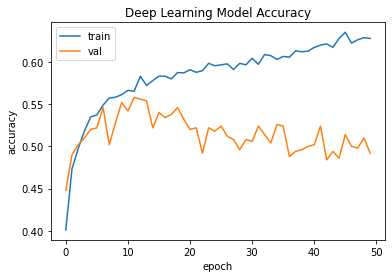

In [16]:
# Using some preset 4x4 filters
from scipy.ndimage import gaussian_filter, sobel, uniform_filter, laplace
A = np.zeros((4,4))
filters = [gaussian_filter(A,sigma=1), sobel(A),uniform_filter(A),laplace(A)]
topfiltlearn(X,y,filters,pool=True)


kNN Results:  [0.64967007 0.63347331 0.65786315]
Gradient Boosting Results:  [0.62927415 0.61727654 0.61704682]


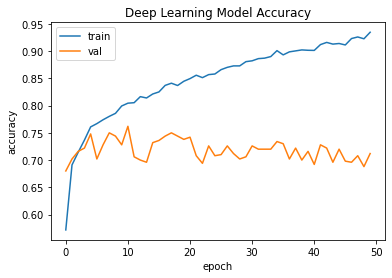

In [17]:
#Using PCA eigenfilters
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA 
patches = []
for im in X:
    patches.extend(extract_patches_2d(im,(4,4)))
#print(np.shape(patches))
patches = np.reshape(patches,(len(patches),16))
pca = PCA(n_components=16)
pca.fit(patches)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#print(pca.explained_variance_ratio_)
M = np.asarray(pca.components_[:10]).T
filters = []
for i in range(16):
    weights = np.random.uniform(size=10)
    weights = weights/sum(weights)
    filters.append(np.reshape(np.matmul(M,weights),(4,4)))

topfiltlearn(X,y,filters,pool=True)

kNN Results:  [0.64907019 0.65806839 0.65246098]
Gradient Boosting Results:  [0.68206359 0.67126575 0.68067227]


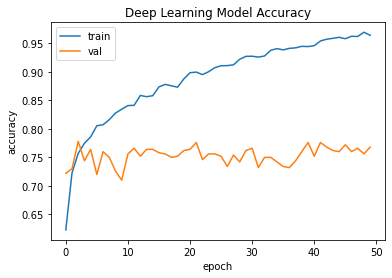

In [18]:
#Using random filters
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

filters = []
for i in range(16):
    filters.append(np.reshape(sample_spherical(1,16),(4,4)))

topfiltlearn(X,y,filters,pool=True)


Time to compute features:  0:03:10.157759
kNN Results:  [0.70725855 0.69466107 0.70408163]
Gradient Boosting Results:  [0.69046191 0.66166767 0.67406963]


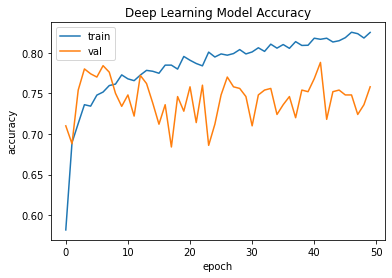

In [26]:
#Using random filters
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

filters = []
for i in range(10):
    filters.append(np.reshape(sample_spherical(1,100),(10,10)))

topfiltlearn(X,y,filters,pool=False)
